
# 군집화 (Clustering)

비지도 학습(Unsupervised Learning)의 한 종류로, 데이터 집합 내에서 비슷한 특성을 가진 데이터끼리 그룹으로 묶는 작업.

### 적용 분야
- 고객 세분화(Customer Segmentation)
- 이상 탐지(Anomaly Detection)
- 이미지 분할(Image Segmentation)
- 데이터 압축(Data Compression)

---


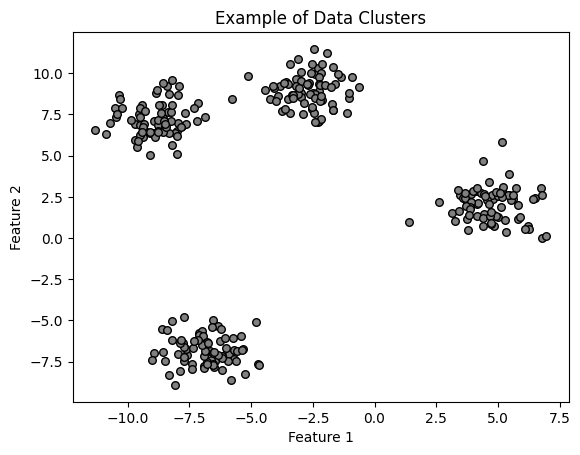

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 군집 데이터를 생성
X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], c='gray', s=30, edgecolor='k')
plt.title("Example of Data Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


---

# k-Means 알고리즘

k-Means는 데이터를 k개의 군집으로 나누는 가장 널리 사용되는 군집화 알고리즘.

### 주요 단계
1. **초기화**: k개의 중심점을 무작위로 설정.
2. **할당**: 각 데이터를 가장 가까운 중심점의 군집에 할당.
3. **중심 갱신**: 각 군집 내 데이터들의 평균을 새로운 중심점으로 설정.
4. **종료 조건**: 중심점의 변화가 없거나, 소속 클러스터가 바뀌지 않거나, 지정된 횟수만큼 반복.


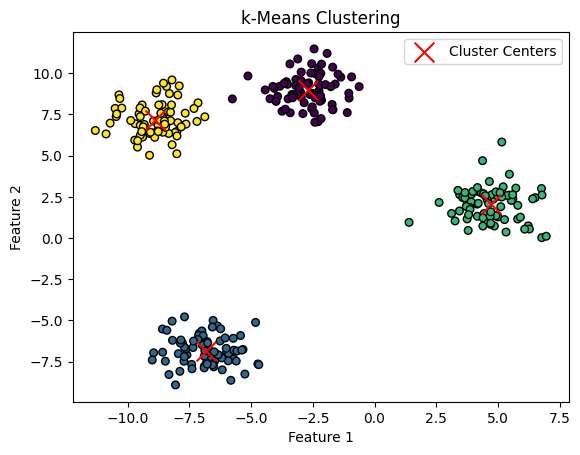

In [15]:
from sklearn.cluster import KMeans

# k-Means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 군집 시각화
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=30, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=200, label='Cluster Centers')
plt.title("k-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


### 하이퍼 파라미터 최적화
- 엘보우는 값이 더 이상 큰 변화가 없는 지점 예) 2-3 사이 -> 3
- 실루엣은 가장 높은 값 선택

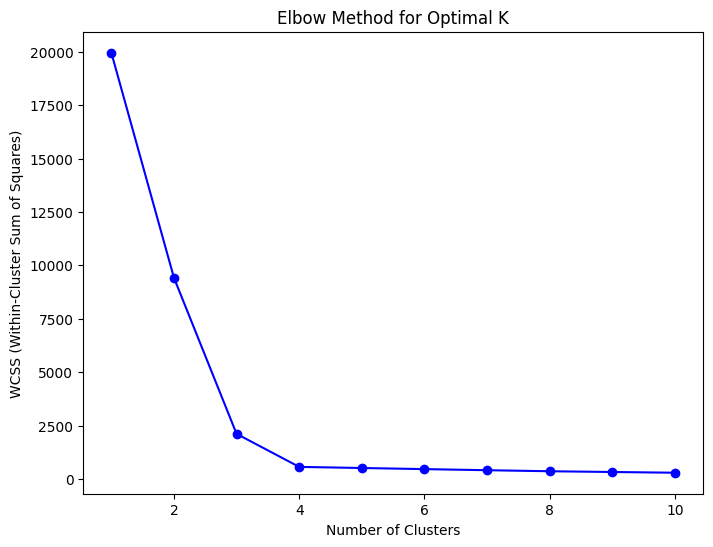

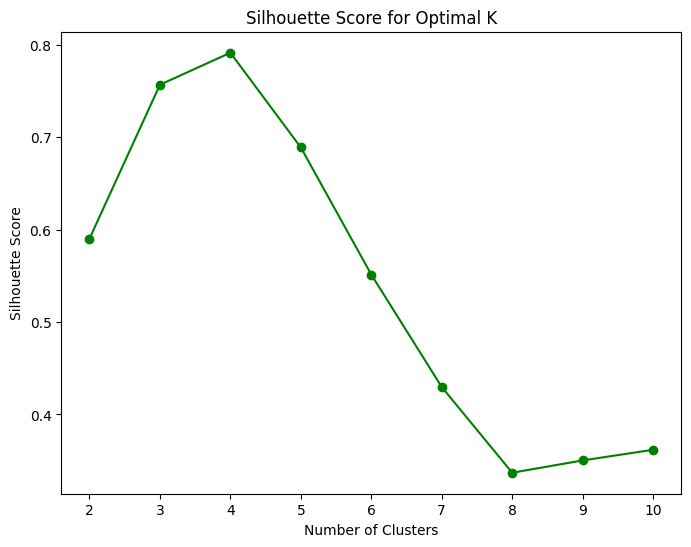

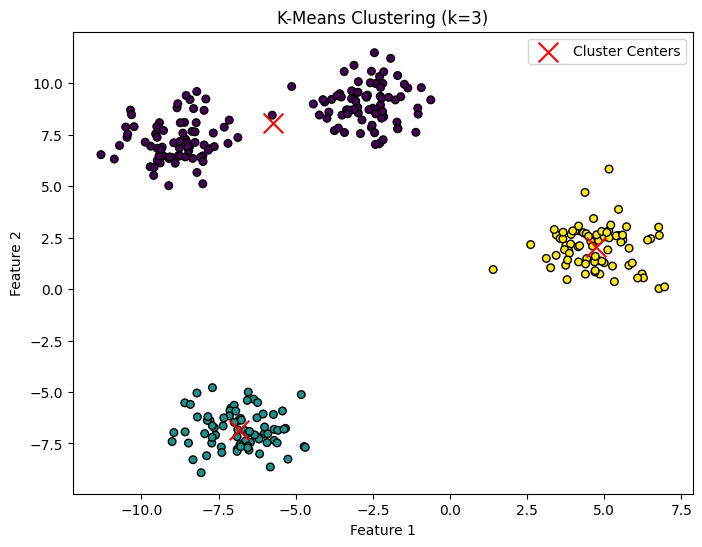

In [9]:
#엘보우
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow Method로 최적의 클러스터 수 찾기
wcss = []
for i in range(1, 11):  # 1부터 10까지의 클러스터 개수로 테스트
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_는 군집 내 제곱 오차의 합

# Elbow 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


# 실루엣
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Silhouette Score를 사용하여 최적의 클러스터 수 찾기
sil_scores = []
for i in range(2, 11):  # 최소 2개 이상의 클러스터부터 시작
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    sil_score = silhouette_score(X, kmeans.labels_)
    sil_scores.append(sil_score)

# Silhouette Score 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o', color='g')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()



# 최적의 군집 수로 k-Means 적용
optimal_clusters = 3  # 예를 들어, 엘보 방법이나 실루엣 점수를 통해 3으로 결정된 경우

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 군집 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=30, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title(f"K-Means Clustering (k={optimal_clusters})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()



--- 
# 군집 평가 방법

군집화의 품질을 평가하기 위한 주요 기법:
- 클러스터 개수 결정!
- 특히 k-means 알고리즘에 많이 쓰임!!

### 엘보우(Elbow) 기법
- SSE(Sum of Squared Errors): 각 데이터와 군집 중심점 간 거리 제곱의 합.
- 군집 수 증가에 따라 SSE가 감소하는데, 감소 폭이 줄어드는 지점을 최적의 k로 선택.

### 실루엣(Silhouette) 계수
- 동일 군집 내 데이터 간 거리는 가깝고, 다른 군집과의 거리는 멀수록 좋은 군집화.
- 실루엣 계수 값이 1에 가까울수록 좋음.


## 엘보우(Elbow) 기법

/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

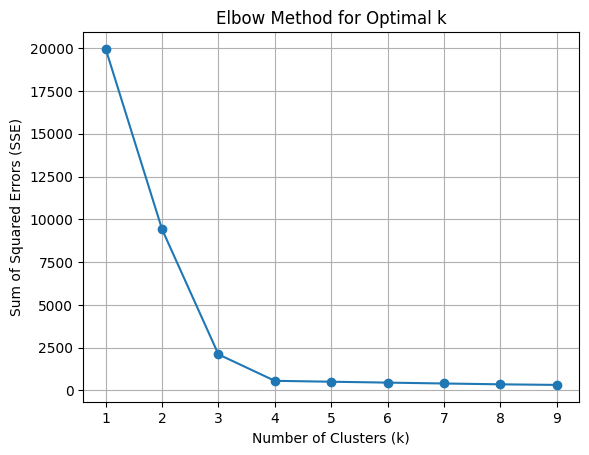

In [4]:
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# 엘보우 기법 시각화
plt.plot(range(1, 10), sse, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True)
plt.show()


## 실루엣(Shihouette) 계수

/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/tf-metal/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

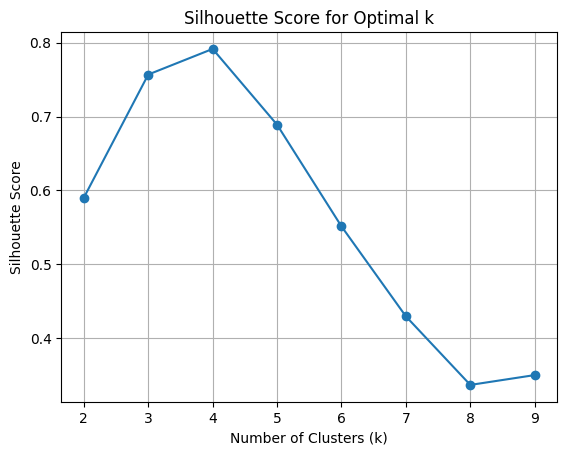

In [5]:
from sklearn.metrics import silhouette_score

# 실루엣 계수 계산 및 시각화
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, y_kmeans))

plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title("Silhouette Score for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


--- 
# 평균 이동 (Mean Shift)

k-Means는 중심점의 평균 위치로 이동시키는 반면, Mean Shift는 데이터의 밀도가 가장 높은 곳으로 중심을 이동.

### 특징
- 확률 밀도 함수의 피크를 중심으로 설정.
- Kernel Density Estimation(KDE)을 사용해 밀도 추정.



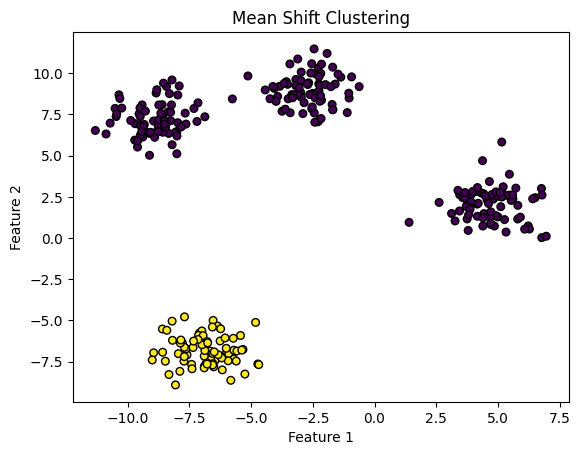

In [11]:
from sklearn.cluster import MeanShift

# 평균 이동 클러스터링
mean_shift = MeanShift()
y_meanshift = mean_shift.fit_predict(X)

# 군집 시각화
plt.scatter(X[:, 0], X[:, 1], c=y_meanshift, cmap='viridis', s=30, edgecolor='k')
plt.title("Mean Shift Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### 하이퍼 파라미터 최적화

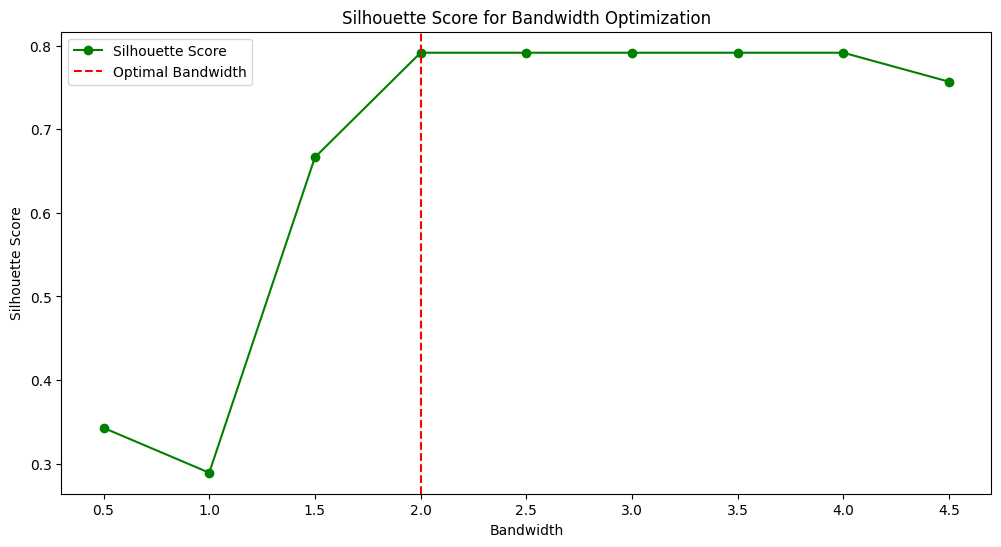

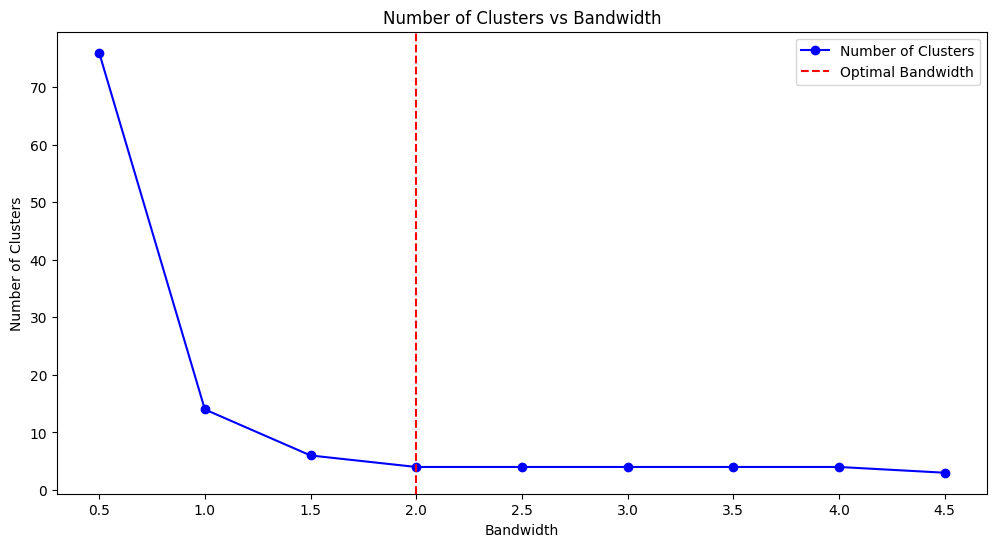

Optimal Bandwidth: 2.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score

# Bandwidth 범위 설정 및 초기화
bandwidth_values = np.arange(0.5, 5.0, 0.5)  # 0.5 단위로 0.5~5.0까지
sil_scores = []  # Silhouette Score 저장
n_clusters_list = []  # 클러스터 개수 저장

# Bandwidth 별로 Silhouette Score 계산
for bandwidth in bandwidth_values:
    mean_shift = MeanShift(bandwidth=bandwidth)
    labels = mean_shift.fit_predict(X)
    
    # 클러스터 개수 확인 (단일 클러스터는 제외)
    n_clusters = len(np.unique(labels))
    if n_clusters > 1:  # 군집 개수가 1이면 Silhouette Score 계산 불가능
        score = silhouette_score(X, labels)
        sil_scores.append(score)
        n_clusters_list.append(n_clusters)
    else:
        sil_scores.append(-1)  # 클러스터가 1개인 경우 -1로 설정
        n_clusters_list.append(n_clusters)

# Silhouette Score 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(bandwidth_values, sil_scores, marker='o', linestyle='-', color='g', label='Silhouette Score')
plt.title("Silhouette Score for Bandwidth Optimization")
plt.xlabel("Bandwidth")
plt.ylabel("Silhouette Score")
plt.axvline(x=bandwidth_values[np.argmax(sil_scores)], color='r', linestyle='--', label='Optimal Bandwidth')
plt.legend()
plt.show()

# Bandwidth에 따른 클러스터 개수 시각화
plt.figure(figsize=(12, 6))
plt.plot(bandwidth_values, n_clusters_list, marker='o', linestyle='-', color='b', label='Number of Clusters')
plt.title("Number of Clusters vs Bandwidth")
plt.xlabel("Bandwidth")
plt.ylabel("Number of Clusters")
plt.axvline(x=bandwidth_values[np.argmax(sil_scores)], color='r', linestyle='--', label='Optimal Bandwidth')
plt.legend()
plt.show()

# 최적의 bandwidth 선택
optimal_bandwidth = bandwidth_values[np.argmax(sil_scores)]
print(f"Optimal Bandwidth: {optimal_bandwidth}")


---

# Gaussian Mixture Model (GMM)

GMM은 데이터가 여러 개의 가우시안 분포로 이루어져 있다고 가정하고 이를 추정.

### 주요 개념
1. 각 데이터가 특정 가우시안 분포에 속할 확률을 계산.
2. EM 알고리즘을 사용해 반복적으로 평균과 분산을 추정.


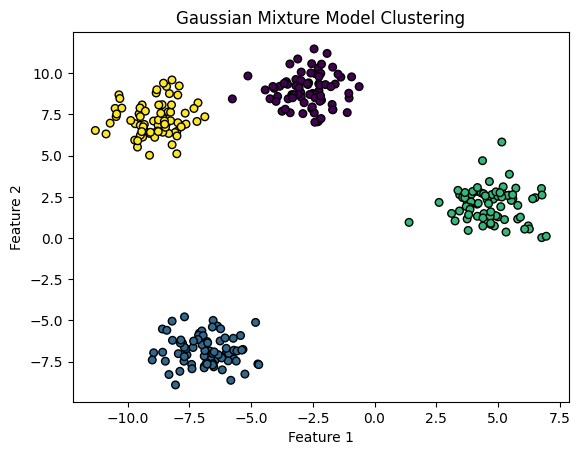

In [ ]:
from sklearn.mixture import GaussianMixture

# GMM 클러스터링
gmm = GaussianMixture(n_components=4, random_state=42)
y_gmm = gmm.fit_predict(X)

# 군집 시각화
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='viridis', s=30, edgecolor='k')
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### 하이퍼 파라미터 최적화

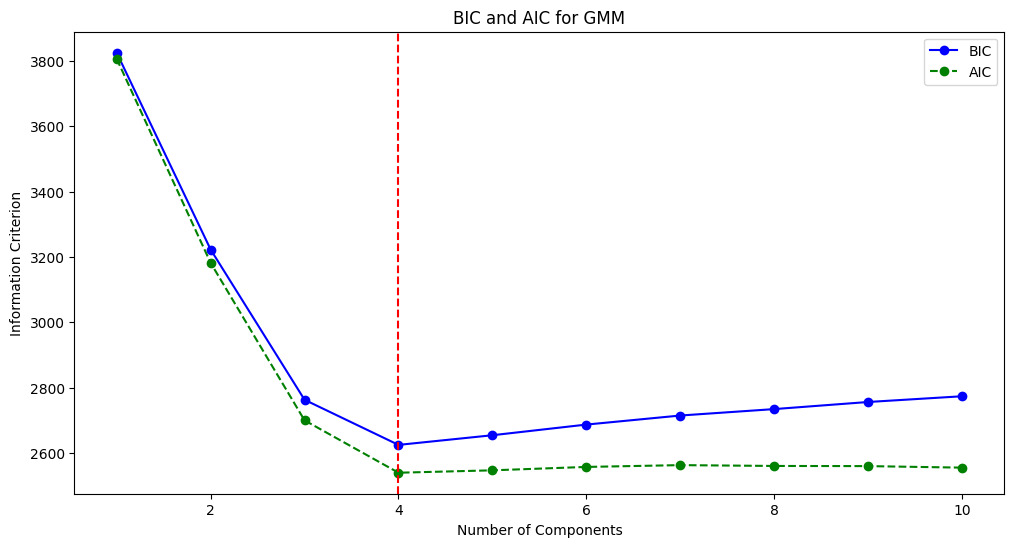

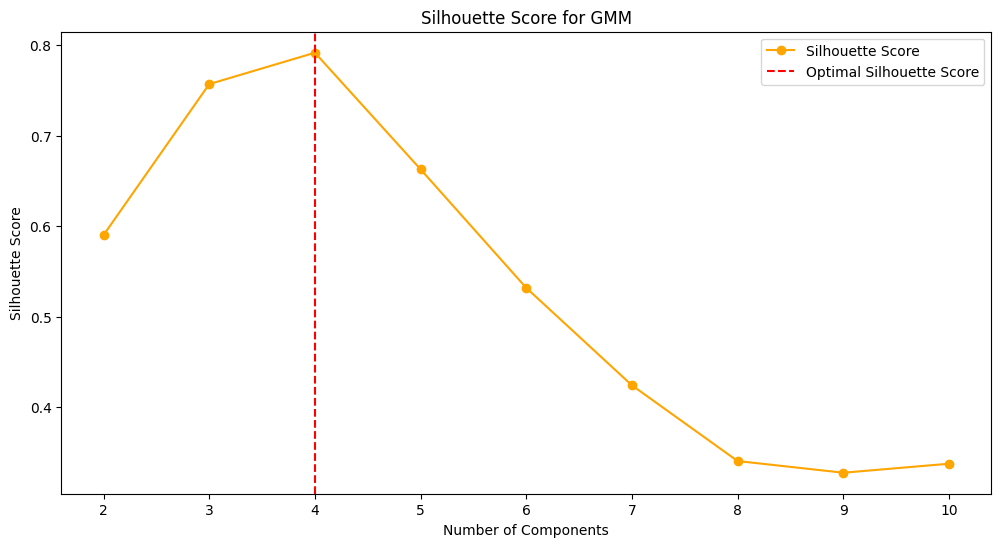

Optimal Number of Components (BIC): 4
Optimal Number of Components (Silhouette): 4


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# 클러스터 개수 범위 설정
n_components_range = range(1, 11)  # 1부터 10까지

# BIC, AIC, Silhouette Score 저장 리스트 초기화
bic_scores = []
aic_scores = []
sil_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X)
    
    # BIC, AIC 계산
    bic_scores.append(gmm.bic(X))
    aic_scores.append(gmm.aic(X))
    
    # Silhouette Score 계산 (군집이 최소 2개일 때만)
    if n_components > 1:
        labels = gmm.predict(X)
        sil_scores.append(silhouette_score(X, labels))
    else:
        sil_scores.append(None)  # 클러스터가 1개일 때는 Silhouette Score 없음

# BIC 및 AIC 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(n_components_range, bic_scores, marker='o', linestyle='-', label='BIC', color='b')
plt.plot(n_components_range, aic_scores, marker='o', linestyle='--', label='AIC', color='g')
plt.title("BIC and AIC for GMM")
plt.xlabel("Number of Components")
plt.ylabel("Information Criterion")
plt.legend()
plt.axvline(x=n_components_range[np.argmin(bic_scores)], color='r', linestyle='--', label='Optimal BIC')
plt.show()

# Silhouette Score 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(n_components_range[1:], sil_scores[1:], marker='o', linestyle='-', color='orange', label='Silhouette Score')
plt.title("Silhouette Score for GMM")
plt.xlabel("Number of Components")
plt.ylabel("Silhouette Score")
plt.axvline(x=n_components_range[1:][np.argmax(sil_scores[1:])], color='r', linestyle='--', label='Optimal Silhouette Score')
plt.legend()
plt.show()

# 최적 클러스터 개수 출력
optimal_bic = n_components_range[np.argmin(bic_scores)]
optimal_silhouette = n_components_range[1:][np.argmax(sil_scores[1:])]

print(f"Optimal Number of Components (BIC): {optimal_bic}")
print(f"Optimal Number of Components (Silhouette): {optimal_silhouette}")


--- 
# DBSCAN (Density-Based Spatial Clustering)

DBSCAN은 데이터 밀도 기반으로 군집을 형성하며, 이상치(Outliers) 처리에도 강점이 있음.

### 주요 파라미터
1. **epsilon (eps)**: 입실론 반경, 데이터 간 거리의 허용 한계.
2. **min_samples**: 군집을 형성하기 위해 필요한 최소 데이터 수.

### 특징
- 데이터 분포가 기하학적으로 복잡해도 잘 작동.
- 노이즈 데이터를 군집화하지 않음.


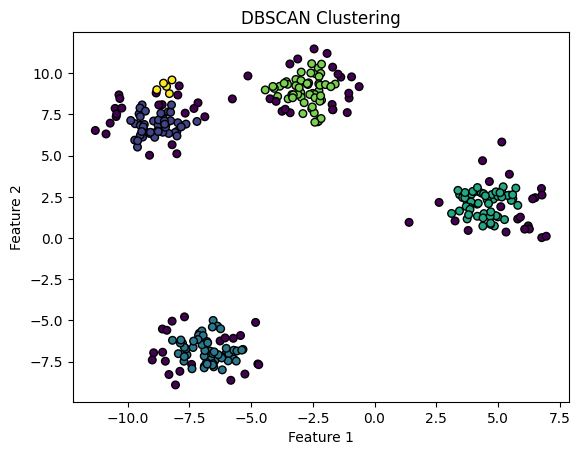

In [8]:
from sklearn.cluster import DBSCAN

# DBSCAN 클러스터링
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# 군집 및 노이즈 시각화
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', s=30, edgecolor='k')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### 하이퍼 파라미터 최적화

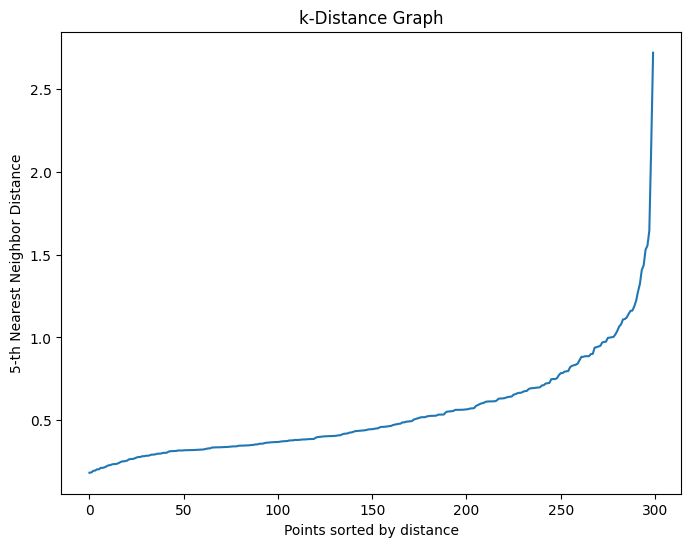

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# 데이터
# X: 입력 데이터 (n_samples, n_features)

# k-거리 그래프
min_samples = 5  # DBSCAN의 기본값
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples)
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)

# 거리 정렬
distances = np.sort(distances[:, -1])  # min_samples번째 이웃 거리
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title("k-Distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples}-th Nearest Neighbor Distance")
plt.show()

# 그래프의 급격한 변화 (엘보우 지점)가 최적 eps 후보 1.0 부근


In [ ]:
# 자동으로 찾기 범위내에서
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# eps와 min_samples의 조합 테스트
eps_values = np.arange(0.1, 2.0, 0.1)  # eps 범위
min_samples_values = range(3, 10)  # min_samples 범위

best_eps = None
best_min_samples = None
best_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        # Silhouette Score는 최소 2개 이상의 클러스터가 있어야 계산 가능
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}")


Best eps: 1.4000000000000001, Best min_samples: 3, Best Silhouette Score: 0.7683435531805964


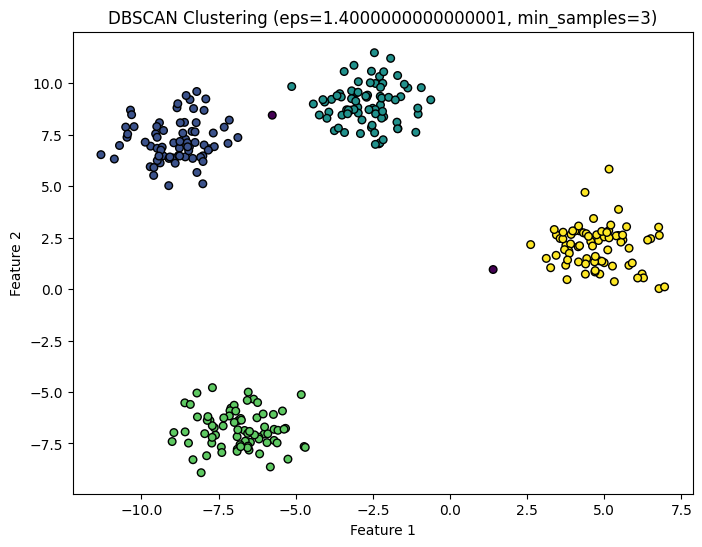

In [9]:
# 최적의 eps와 min_samples로 DBSCAN 수행
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
y_dbscan = dbscan.fit_predict(X)

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', s=30, edgecolor='k')
plt.title(f"DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Best eps: 1.4000000000000006, Best min_samples: 2, Best Silhouette Score: 0.7683435531805964


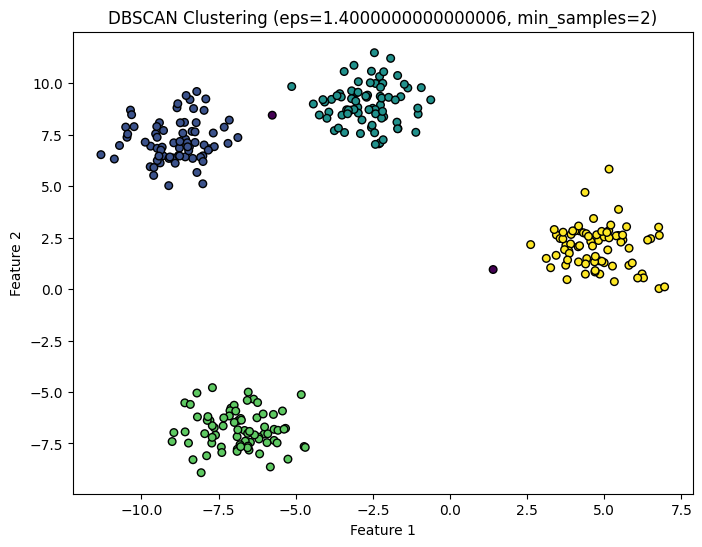

In [13]:
# 범위 설정해서 직접 대입해서 찾기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# eps와 min_samples의 범위 설정
eps_range = np.arange(0.1, 2.1, 0.05)       # eps: 0.1부터 2.0까지 0.1 단위로 증가
min_samples_range = np.arange(2, 11, 1)    # min_samples: 2부터 10까지 1 단위로 증가

# 최적의 결과 저장 변수 초기화
best_eps = None
best_min_samples = None
best_score = -1

# 결과 저장용 리스트
results = []

# eps와 min_samples 모든 조합 탐색
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=int(min_samples))  # min_samples는 정수로 변환
        labels = dbscan.fit_predict(X)
        
        # Silhouette Score는 최소 2개의 클러스터가 있을 때만 계산 가능
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
            results.append((eps, min_samples, score))
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

# 최적의 eps와 min_samples 출력
print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}")

# 최적의 DBSCAN 모델로 시각화
dbscan = DBSCAN(eps=best_eps, min_samples=int(best_min_samples))
y_dbscan = dbscan.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', s=30, edgecolor='k')
plt.title(f"DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


--- 
# 고객 세그멘테이션 (Customer Segmentation)

고객 데이터를 군집화하여 세분화하고, 마케팅 전략을 최적화하는 기법.

### RFM 분석
- **Recency**: 최근 구매 일로부터 현재까지의 시간.
- **Frequency**: 특정 기간 내 구매 횟수.
- **Monetary Value**: 총 구매 금액.


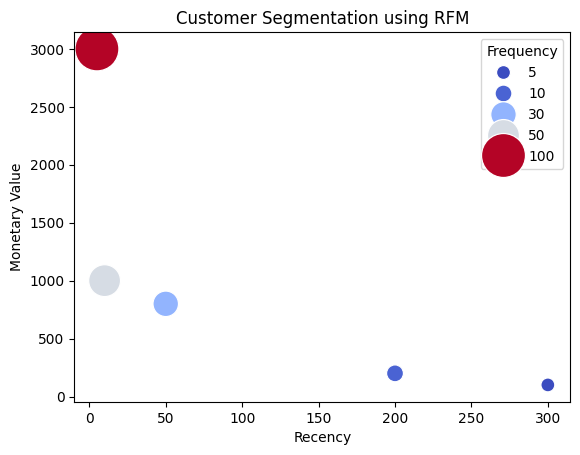

In [9]:
import pandas as pd
import seaborn as sns

# RFM 데이터 예제 생성
rfm_data = pd.DataFrame({
    'Recency': [10, 200, 5, 50, 300],
    'Frequency': [50, 10, 100, 30, 5],
    'Monetary Value': [1000, 200, 3000, 800, 100]
})

# 시각화
sns.scatterplot(data=rfm_data, x='Recency', y='Monetary Value', size='Frequency', sizes=(100, 1000), hue='Frequency', palette='coolwarm')
plt.title("Customer Segmentation using RFM")
plt.xlabel("Recency")
plt.ylabel("Monetary Value")
plt.legend(title='Frequency')
plt.show()


### 하이퍼 파라미터 최적화

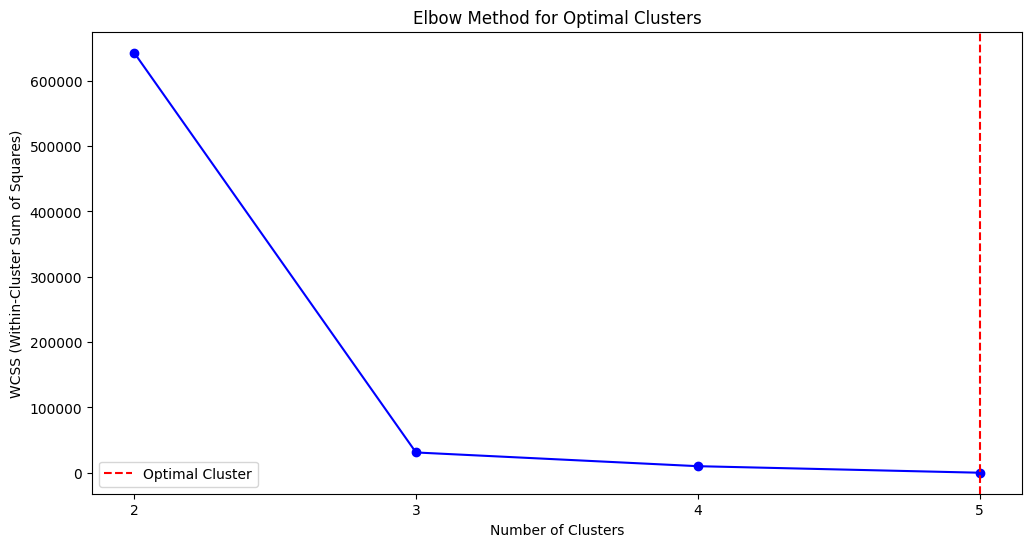

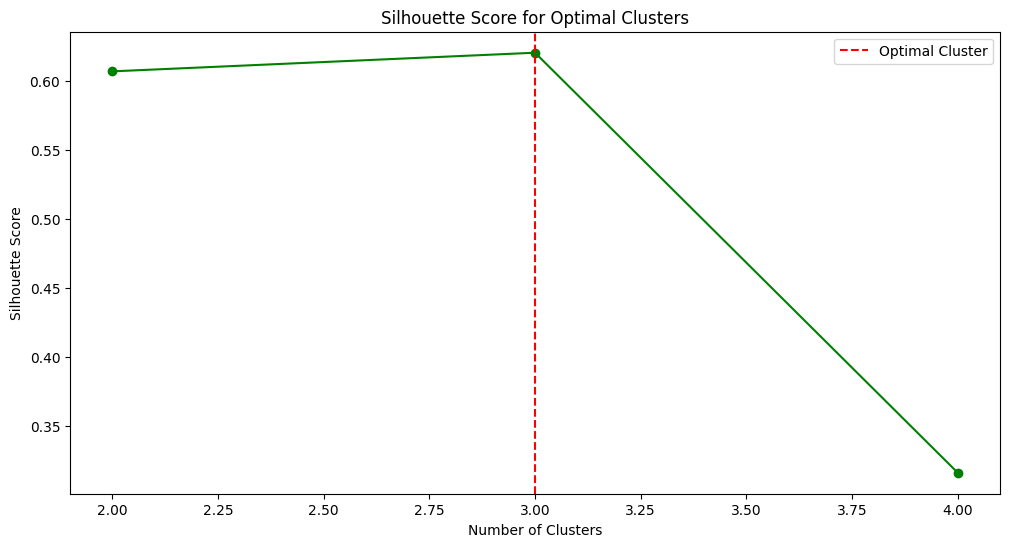

Optimal Number of Clusters (WCSS): 5
Optimal Number of Clusters (Silhouette): 3


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# RFM 데이터 예제 생성
rfm_data = pd.DataFrame({
    'Recency': [10, 200, 5, 50, 300],
    'Frequency': [50, 10, 100, 30, 5],
    'Monetary Value': [1000, 200, 3000, 800, 100]
})

# 데이터 샘플 개수 확인
n_samples = rfm_data.shape[0]

# 클러스터 수 범위 설정 (샘플 개수 이하로 제한)
cluster_range = np.arange(2, min(11, n_samples + 1))  # 2부터 min(11, n_samples+1)까지

# 최적 클러스터 찾기
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []  # Silhouette Scores

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    labels = kmeans.fit_predict(rfm_data)
    
    # WCSS 저장
    wcss.append(kmeans.inertia_)
    
    # Silhouette Score 계산 (유효한 레이블 조건 추가)
    n_labels = len(set(labels))
    if 2 <= n_labels < len(rfm_data):  # 레이블 개수가 2 이상이어야 하고, 데이터 개수보다 작아야 함
        score = silhouette_score(rfm_data, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)  # 계산 불가능한 경우 None 추가

# WCSS 그래프 (Elbow Method)
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.xticks(cluster_range)
plt.axvline(x=cluster_range[np.argmin(np.gradient(np.gradient(wcss)))], color='r', linestyle='--', label='Optimal Cluster')
plt.legend()
plt.show()

# Silhouette Score 그래프
plt.figure(figsize=(12, 6))
valid_scores = [score for score in silhouette_scores if score is not None]  # None 제거
valid_clusters = [cluster_range[i] for i, score in enumerate(silhouette_scores) if score is not None]

plt.plot(valid_clusters, valid_scores, marker='o', linestyle='-', color='g')
plt.title("Silhouette Score for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=valid_clusters[np.argmax(valid_scores)], color='r', linestyle='--', label='Optimal Cluster')
plt.legend()
plt.show()

# 최적 클러스터 수 출력
optimal_clusters_wcss = cluster_range[np.argmin(np.gradient(np.gradient(wcss)))]
optimal_clusters_silhouette = valid_clusters[np.argmax(valid_scores)]
print(f"Optimal Number of Clusters (WCSS): {optimal_clusters_wcss}")
print(f"Optimal Number of Clusters (Silhouette): {optimal_clusters_silhouette}")


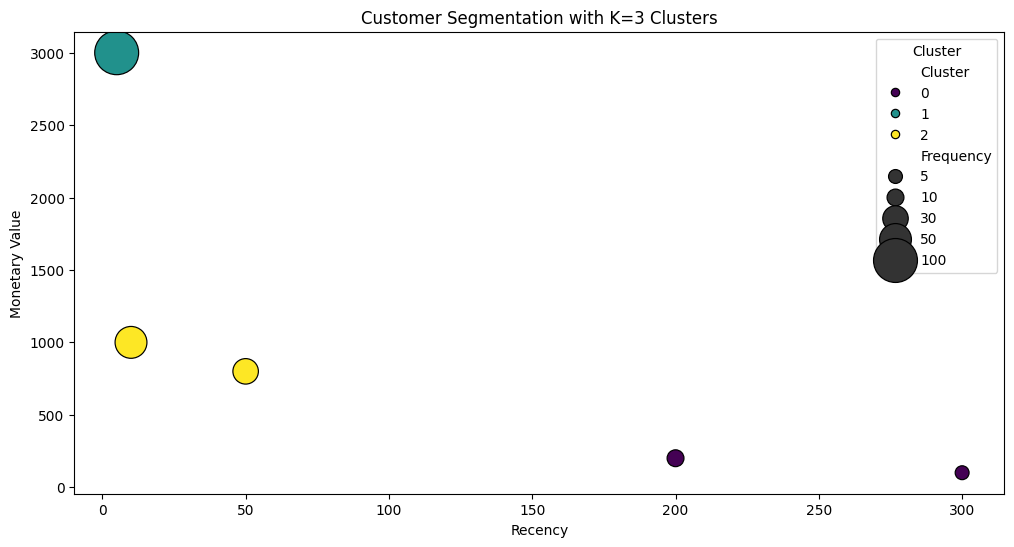

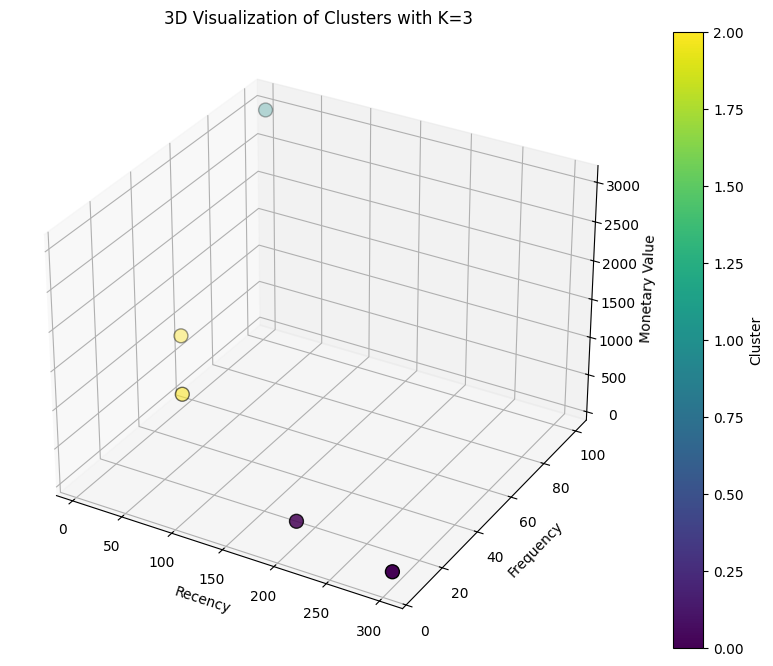

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# 최적의 클러스터 수로 K-Means 실행
optimal_k = optimal_clusters_silhouette  # Silhouette Score 기반 최적 클러스터 수 사용
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_data)

# 2D 시각화 (Recency vs Monetary Value)
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=rfm_data,
    x='Recency',
    y='Monetary Value',
    hue='Cluster',
    palette='viridis',
    size='Frequency',
    sizes=(100, 1000),
    edgecolor='k'
)
plt.title(f"Customer Segmentation with K={optimal_k} Clusters")
plt.xlabel("Recency")
plt.ylabel("Monetary Value")
plt.legend(title="Cluster")
plt.show()

# 3D 시각화 (Recency, Frequency, Monetary Value)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    rfm_data['Recency'],
    rfm_data['Frequency'],
    rfm_data['Monetary Value'],
    c=rfm_data['Cluster'],
    cmap='viridis',
    s=100,
    edgecolor='k'
)
ax.set_title(f"3D Visualization of Clusters with K={optimal_k}")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary Value")
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()
